# Federpendel

<img src="figures/Federpendel2.png" width="200">

The movement of a spring pendulum with a mass $m$ and a spring constant $k$ (stating how much force has to be applied to the spring to distort it a given distance from its equilibrium) can be described by the the following equation:

\begin{equation}
x(t)=x_0\,e^{-\delta t}\cos(\omega_d\, t+ \varphi_0)
\end{equation}

## Helpers/Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.optimize import least_squares
from scipy.optimize import minimize

ModuleNotFoundError: No module named 'scipy'

In [ ]:
def FormatAxis(ax,fontsize,rotation = 0):
    """Helper function to format plotting axes in matplotlib"""
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
        tick.label.set_rotation(rotation)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize) 
        
fontsize = 20

In [ ]:
# implemented solution of differential equation x(t)
# para[0]: Amplitude
# para[1]: Abklingkonstante
# para[2]: Gedämpfte Kreisfrequenz
# para[3]: Phasenverschiebung phi_0

para_true = [2,0.7,1,3.14159]

def model(t,para):
    #return para[0] * np.exp(-para[1] * t) * np.cos(para[2] * t + para[3])
    return para[0] * np.exp(-para[1] * t) * np.sin(para[2] * t + para[3])

def D_model(t,para):
    # first derivative of model function
    return -para[1] * model(t,para) - para[0]*np.exp(-para[1] * t) * np.sin(para[2] * t + para[3]) * para[2]

In [2]:
import random

In [17]:
n_max = 10
n_test = 20

min_x = 0
max_x = 4

sigma = 0.06

random_numbers = np.zeros(n_max)
for i in range(0,n_max):
    value = random.random()
    random_numbers[i] = min_x + (value * (max_x - min_x))

In [18]:
#random_numbers = np.linspace(min_x,max_x,n_max)
test = [model(t,para_true)+random.gauss(0,sigma) for t in random_numbers]

In [19]:
a = np.array([random_numbers,test])
np.savetxt("test_data.csv", a, delimiter=',',comments="")

In [20]:
random_numbers = np.zeros(n_test)
for i in range(0,n_test):
    value = random.random()
    random_numbers[i] = min_x + (value * (max_x - min_x))

In [21]:
#random_numbers = np.linspace(min_x,max_x,n_test)
test = [model(t,para_true)+random.gauss(0,sigma) for t in random_numbers]

In [22]:
a = np.array([random_numbers,test])
np.savetxt("train_data.csv", a, delimiter=',',comments="")

# Generate Data

In [213]:
# define number of data points

times = np.linspace(min_x,max_x,n_max)

times_model = np.linspace(min_x,max_x,1000)
x_exact = [model(t,para_true) for t in times_model]
x_random = [model(t,para_true)+random.gauss(0,sigma) for t in times]

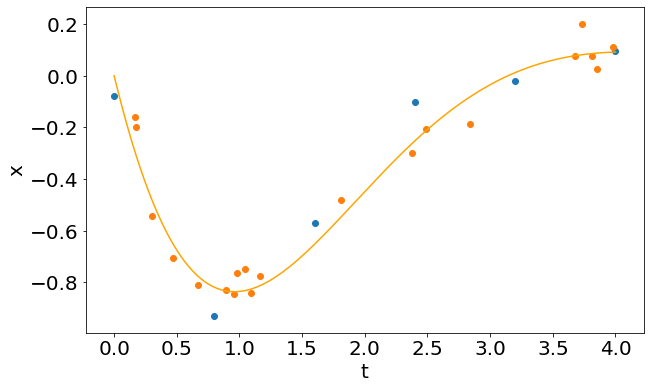

In [215]:
fig = plt.figure(figsize= (10,6))
plt.plot(times_model,x_exact, color = "orange")
plt.scatter(times,x_random)
plt.scatter(random_numbers,test)
plt.xlabel("t",fontsize = fontsize)
plt.ylabel("x", fontsize = fontsize)
ax = plt.gca()
FormatAxis(ax,20)

In [251]:
para_true = [2,0,1,3.14159/2]
max_x = 10
n_max = 30
times = np.linspace(min_x,max_x,n_max)
x_random = [model(t,para_true)+random.gauss(0,0.2) for t in times]
a = np.array([times,x_random])
np.savetxt("spring_pendulum_train_data_equi.csv", a, delimiter=',',comments="")

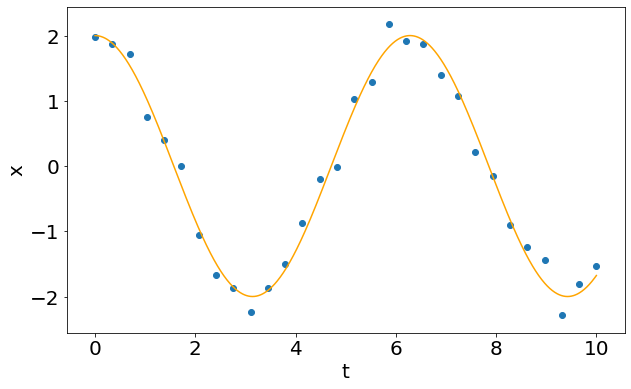

In [252]:
times_model = np.linspace(min_x,max_x,1000)

fig = plt.figure(figsize= (10,6))
plt.plot(times_model,model(times_model,para_true), color = "orange")
plt.scatter(times,x_random)
plt.xlabel("t",fontsize = fontsize)
plt.ylabel("x", fontsize = fontsize)
ax = plt.gca()
FormatAxis(ax,20)